In [1]:
import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
# Load the data and split it between train and test sets

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

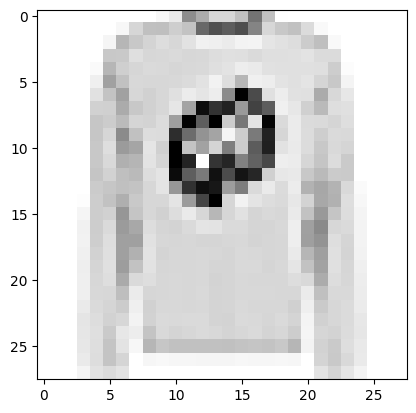

In [5]:
plt.imshow(x_train[123], cmap='Greys')

In [6]:
len(x_train[0][0])

28

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)

In [10]:
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [13]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 13s 30ms/step - loss: 0.6962 - accuracy: 0.7495 - val_loss: 0.4422 - val_accuracy: 0.8373
Epoch 2/15
422/422 [==============================] - 13s 30ms/step - loss: 0.4504 - accuracy: 0.8368 - val_loss: 0.3803 - val_accuracy: 0.8622
Epoch 3/15
422/422 [==============================] - 13s 31ms/step - loss: 0.4028 - accuracy: 0.8569 - val_loss: 0.3549 - val_accuracy: 0.8748
Epoch 4/15
422/422 [==============================] - 14s 32ms/step - loss: 0.3744 - accuracy: 0.8657 - val_loss: 0.3296 - val_accuracy: 0.8798
Epoch 5/15
422/422 [==============================] - 13s 32ms/step - loss: 0.3523 - accuracy: 0.8739 - val_loss: 0.3193 - val_accuracy: 0.8857
Epoch 6/15
422/422 [==============================] - 13s 31ms/step - loss: 0.3357 - accuracy: 0.8781 - val_loss: 0.2994 - val_accuracy: 0.8928
Epoch 7/15
422/422 [==============================] - 13s 31ms/step - loss: 0.3240 - accuracy: 0.8842 - val_loss: 0.3016 - val_accuracy:

In [15]:
#TEST

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.27056825160980225
Test accuracy: 0.8996000289916992


In [16]:
from sklearn.metrics import confusion_matrix

#generamos la prediccion
y_pred = model.predict(x_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test_class, y_pred_class)

print(cm)

313/313 [==============================] - 1s 3ms/step
[[848   0  16  18   2   1 109   0   6   0]
 [  1 975   1  17   1   0   3   0   2   0]
 [ 14   0 838  10  60   0  77   0   1   0]
 [ 13   2  10 906  24   0  44   0   1   0]
 [  2   1  30  30 836   0 101   0   0   0]
 [  0   0   0   0   0 973   0  16   0  11]
 [123   0  62  22  66   0 715   0  12   0]
 [  0   0   0   0   0   8   0 960   0  32]
 [  2   0   5   4   2   2   5   4 976   0]
 [  0   0   0   0   0   5   0  25   1 969]]


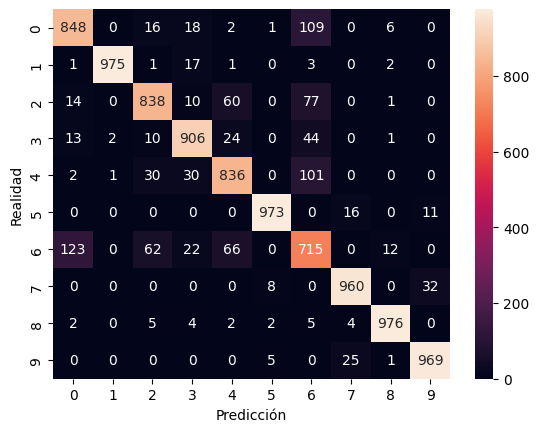

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Realidad')

plt.show()

In [18]:
#TRAIN
score_train = model.evaluate(x_train, y_train, verbose=0)

print("Train loss:", score[0])
print("Train accuracy:", score[1])

Train loss: 0.27056825160980225
Train accuracy: 0.8996000289916992


In [19]:
#Comparar resultados Test vs Train
import pandas as pd

columnas = ['loss', 'accuracy']
data_score= [ [score[0], score[1]], [score_train[0], score_train[1]] ]
df_resultados = pd.DataFrame(columns=columnas, data=data_score)

print(df_resultados)

       loss  accuracy
0  0.270568   0.89960
1  0.223018   0.92015


In [20]:
from sklearn.metrics import confusion_matrix

#generamos la prediccion
y_pred_train = model.predict(x_train)

y_test_train_class = np.argmax(y_train, axis=1)
y_pred_train_class = np.argmax(y_pred_train, axis=1)

cm_train = confusion_matrix(y_test_train_class, y_pred_train_class)

print(cm)

1875/1875 [==============================] - 5s 3ms/step
[[848   0  16  18   2   1 109   0   6   0]
 [  1 975   1  17   1   0   3   0   2   0]
 [ 14   0 838  10  60   0  77   0   1   0]
 [ 13   2  10 906  24   0  44   0   1   0]
 [  2   1  30  30 836   0 101   0   0   0]
 [  0   0   0   0   0 973   0  16   0  11]
 [123   0  62  22  66   0 715   0  12   0]
 [  0   0   0   0   0   8   0 960   0  32]
 [  2   0   5   4   2   2   5   4 976   0]
 [  0   0   0   0   0   5   0  25   1 969]]


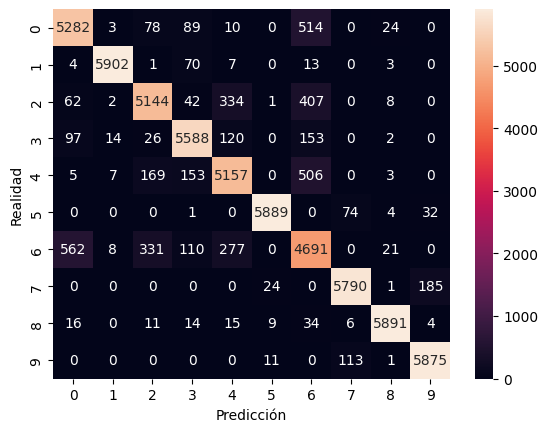

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_train, annot=True, fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Realidad')

plt.show()